In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import impdar

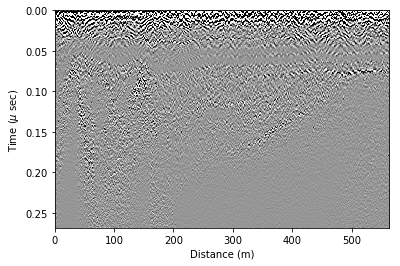

In [2]:
dat = impdar.load.load('mat',['20180423_LINE01.mat'])[0]
plt.imshow(dat.data,cmap='Greys',vmin=-100,vmax=100,aspect='auto',extent=[min(dat.dist),max(dat.dist),max(dat.travel_time),min(dat.travel_time)])
plt.ylabel('Time ($\mu$ sec)');
plt.xlabel('Distance (m)');

/Users/benhills/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


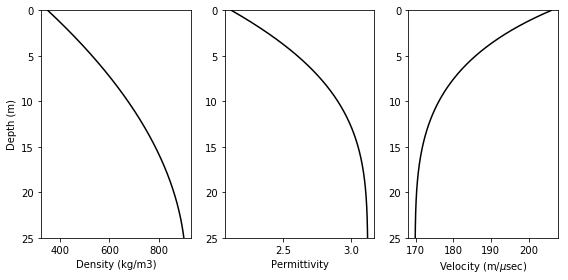

In [3]:
rho_profile_data = np.genfromtxt('2018_density_profile.csv',delimiter=',')
profile_depth = rho_profile_data[:,0]
profile_rho = rho_profile_data[:,1]

from impdar.lib.permittivity_models import firn_permittivity

plt.figure(figsize=(8,4))

ax1 = plt.subplot(131)
plt.ylabel('Depth (m)')
plt.xlabel('Density (kg/m3)')
plt.plot(profile_rho,profile_depth,'k')
plt.ylim(max(profile_depth),0)

ax2 = plt.subplot(132)
plt.xlabel('Permittivity')
plt.plot(firn_permittivity(profile_rho),profile_depth,'k')
plt.ylim(max(profile_depth),0)

ax3 = plt.subplot(133)
plt.xlabel('Velocity (m/$\mu$sec)')
plt.plot(300/np.sqrt(np.real(firn_permittivity(profile_rho))),profile_depth,'k')
plt.ylim(max(profile_depth),0)

plt.tight_layout()
plt.draw()

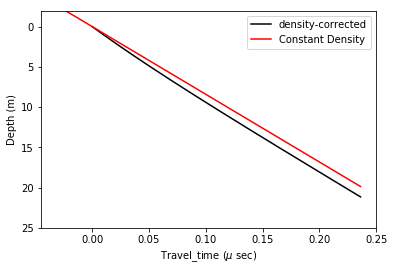

In [8]:
from impdar.lib.RadarData._RadarDataProcessing import nmo

nmo(dat,0,rho_profile='2018_density_profile.csv')

uice=168
plt.plot(dat.travel_time,dat.nmo_depth,'k',label='density-corrected')
plt.plot(dat.travel_time,dat.travel_time*uice/2.,'r',label='Constant Density')
plt.ylim(25,-2)
plt.xlabel('Travel_time ($\mu$ sec)')
plt.ylabel('Depth (m)')
plt.legend()